In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
Nind = 8              
Lind = 3              
Pc = 0.7           
Pm = 1 / 5           
Maxgen = 100        
Nvar = 1            
rango = np.array([[0, 0.875]])

In [15]:
def objfun(fenotipo):
    x = fenotipo[:, 0]
    term = (11/2)*x - (7/2)
    f = 1 - (term**2) * np.cos(term) + 1 + 2
    return f.reshape(-1, 1)

In [16]:
def creaprob(Nind, Lind):
    return np.random.randint(0, 2, size=(Nind, Lind))

In [17]:
def decodifica(genotipo, rango):
    Nind, Lind = genotipo.shape
    Lvar = Lind  # sola una variable
    potencias = 2 ** np.arange(Lvar)[::-1]
    fenotipo = np.sum(genotipo * potencias, axis=1).reshape(-1, 1)
    fenotipo = rango[0, 0] + ((rango[0, 1] - rango[0, 0]) / (2 ** Lvar - 1)) * fenotipo
    return fenotipo

In [18]:
def rankeo(objv, direccion):
    SP = 2
    Nind = len(objv)
    aptitud = np.zeros((Nind, 1))
    if direccion == 1:
        nuevo_objv = np.sort(objv, axis=0)
    else:
        nuevo_objv = np.sort(-1 * objv, axis=0)
    apt = 2 - SP + 2 * (SP - 1) * (np.arange(Nind) / (Nind - 1))
    posori = np.argsort(nuevo_objv, axis=0)
    aptitud[posori, 0] = apt.reshape(-1, 1)
    return aptitud

In [19]:
def ruleta(genotipo, fenotipo, aptitud):
    Nind = len(aptitud)
    total = np.sum(aptitud)
    probabilidad = aptitud / total
    acumulada = np.cumsum(probabilidad)
    idx = np.zeros((Nind, 1), dtype=int)
    for i in range(Nind):
        selecciona = np.random.rand()
        aux = np.where(acumulada >= selecciona)[0]
        idx[i, 0] = aux[0]
    nuevo_gen = genotipo[idx.flatten(), :]
    return nuevo_gen

In [20]:
def xunpunto(nuevo_gen, Pc):
    Nind, Lind = nuevo_gen.shape
    aux_gen = np.zeros((Nind, Lind))
    par = Nind % 2
    for i in range(0, Nind - 1, 2):
        cruza = np.random.rand()
        if cruza <= Pc:
            corte = np.random.randint(1, Lind)  # evitar corte en 0
            aux_gen[i, :] = np.concatenate((nuevo_gen[i, :corte], nuevo_gen[i + 1, corte:]))
            aux_gen[i + 1, :] = np.concatenate((nuevo_gen[i + 1, :corte], nuevo_gen[i, corte:]))
        else:
            aux_gen[i, :] = nuevo_gen[i, :]
            aux_gen[i + 1, :] = nuevo_gen[i + 1, :]
    if par == 1:
        aux_gen[Nind - 1, :] = nuevo_gen[Nind - 1, :]
    return aux_gen

In [21]:
def muta(nuevo_gen, Pm):
    Nind, Lind = nuevo_gen.shape
    valores = np.random.rand(Nind, Lind)
    muta = valores <= Pm
    nuevo_gen = np.logical_xor(nuevo_gen, muta).astype(int)
    return nuevo_gen

In [22]:
genotipo = creaprob(Nind, Lind)
fenotipo = decodifica(genotipo, rango)
generaciones = 0
Mejor = np.full((Maxgen, 1), np.nan)
Mejor_cromosoma = np.zeros((Maxgen, Lind))
objv = objfun(fenotipo)

In [23]:
while generaciones < Maxgen:
    aptitud = rankeo(objv, 1)
    nuevo_gen = ruleta(genotipo, fenotipo, aptitud)
    nuevo_gen = xunpunto(nuevo_gen, Pc)
    nuevo_gen = muta(nuevo_gen, Pm)
    nuevo_feno = decodifica(nuevo_gen, rango)
    nuevo_objv = objfun(nuevo_feno)
    genotipo = nuevo_gen
    objv = nuevo_objv
    idx = np.argmax(objv)
    Mejor[generaciones] = objv[idx]
    Mejor_cromosoma[generaciones, :] = genotipo[idx, :]
    generaciones += 1

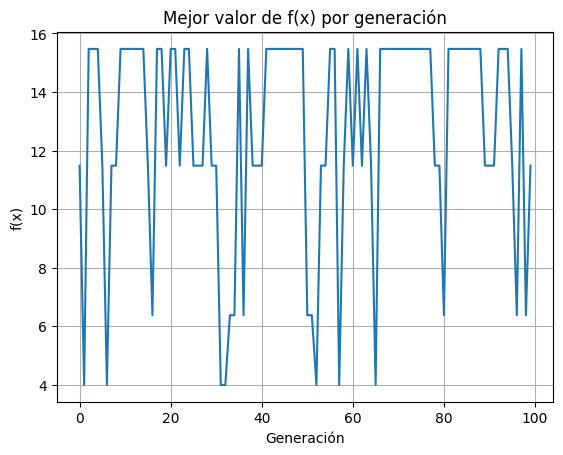

In [24]:
plt.plot(range(Maxgen), Mejor)
plt.title('Mejor valor de f(x) por generación')
plt.xlabel('Generación')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()